In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
car=pd.read_csv(r'C:\Users\Nayee\OneDrive\Desktop\matplotlib\env\Selling of car volume in USA.csv')
car

,Year,Brand,Model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,milage,selling_price,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)


In [2]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558836 entries, 0 to 558835
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           558836 non-null  int64  
 1   Brand          548535 non-null  object 
 2   Model          548437 non-null  object 
 3   trim           548185 non-null  object 
 4   body           545641 non-null  object 
 5   transmission   493484 non-null  object 
 6   vin            558832 non-null  object 
 7   state          558836 non-null  object 
 8   condition      547016 non-null  float64
 9   odometer       558742 non-null  float64
 10  color          558087 non-null  object 
 11  interior       558087 non-null  object 
 12  seller         558836 non-null  object 
 13  milage         558798 non-null  float64
 14  selling_price  558824 non-null  float64
 15  saledate       558824 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [3]:
car.describe()

,Year,condition,odometer,milage,selling_price
count,558836.000000,547016.000000,558742.000000,558798.000000,558824.000000
mean,2010.038918,30.672351,68320.110228,13769.375114,13611.363304
std,3.966862,13.402840,53398.545878,9679.975671,9749.509772
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [4]:
#frequency of qualitative data 
fre_color=pd.crosstab(index=car["color"],columns="count")

In [5]:
fre_color

col_0,count
color,
11034,1
1167,1
12655,1
14872,1
15719,1
16633,1
18384,1
18561,1
20379,1


In [9]:
fre_brand=pd.crosstab(index=car["Brand"],columns="count")

<Axes: xlabel='Brand'>

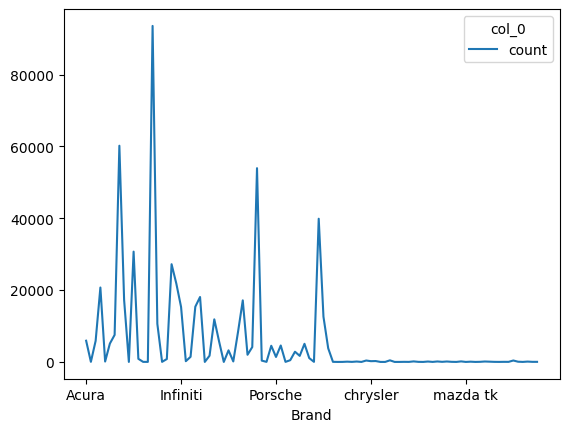

In [7]:
fre_brand.head(100)
fre_brand.plot()

KeyError: 'sellin_gprice'

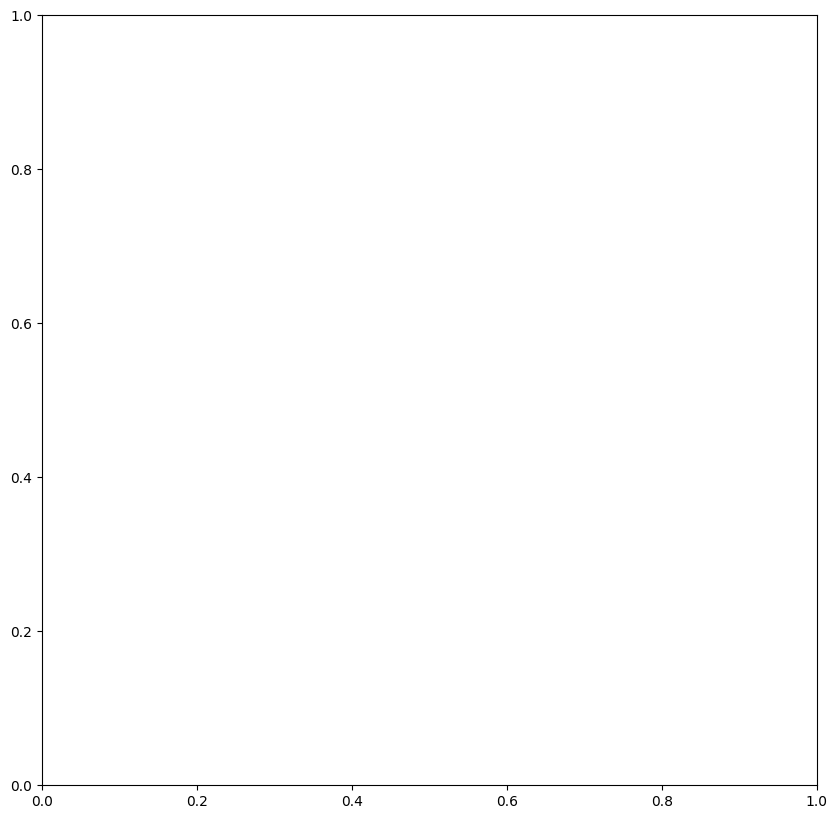

In [8]:
#Make scatter plot 
car.plot(kind="scatter",
         x="Year",
         y="sellin_gprice",
         figsize=(10,10),
         color="blue")

In [ ]:
# Assuming car is your dataset
x = pd.DataFrame(car["Year"])
y = pd.DataFrame(car["selling_price"])  # Assuming "selling_price" is the target variable

# Impute missing values with mean (you can choose another strategy if needed)
y.fillna(y.mean(), inplace=True)

# Instantiating the LinearRegression model
linear_model = LinearRegression()
linear_model.fit(x, y)
linear_model.coef_
linear_model.intercept_





array([-2883648.230255])

In [ ]:
car.describe()

,Year,condition,odometer,milage,selling_price
count,558836.000000,547016.000000,558742.000000,558798.000000,558824.000000
mean,2010.038918,30.672351,68320.110228,13769.375114,13611.363304
std,3.966862,13.402840,53398.545878,9679.975671,9749.509772
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558836 entries, 0 to 558835
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           558836 non-null  int64  
 1   Brand          548535 non-null  object 
 2   Model          548437 non-null  object 
 3   trim           548185 non-null  object 
 4   body           545641 non-null  object 
 5   transmission   493484 non-null  object 
 6   vin            558832 non-null  object 
 7   state          558836 non-null  object 
 8   condition      547016 non-null  float64
 9   odometer       558742 non-null  float64
 10  color          558087 non-null  object 
 11  interior       558087 non-null  object 
 12  seller         558836 non-null  object 
 13  milage         558798 non-null  float64
 14  selling_price  558824 non-null  float64
 15  saledate       558824 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
x=pd.DataFrame(car["milage"])
y=pd.DataFrame(car["selling_price"])
x.fillna(x.mean(),inplace=True)
y.fillna(y.mean(),inplace=True)
LM2=LinearRegression()
LM2.fit(x,y)
LM2.coef_

array([[0.99072365]])

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd 
import statsmodels.api as sm
x=pd.DataFrame(car["Year"])
y=pd.DataFrame(car["condition"])
x.fillna(x.mean(),inplace=True)
y.fillna(y.mean(),inplace=True)
LM3=LinearRegression()
LM3.fit(x,y)
x = sm.add_constant(x)


ols_model = sm.OLS(y, x).fit()


print(ols_model.summary())



                            OLS Regression Results                            
Dep. Variable:              condition   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                 6.903e+04
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:54:38   Log-Likelihood:            -2.2049e+06
No. Observations:              558836   AIC:                         4.410e+06
Df Residuals:                  558834   BIC:                         4.410e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2197.2525      8.480   -259.120      0.0

In [ ]:
LM3.coef_

NameError: name 'LM3' is not defined